# Tutorial 1 Solution
## Machine Learning for Data Analysis

### Loading the Iris data
Iris data set consists of 150 samples having three classes namely Iris-Setosa, Iris-Versicolor, and Iris-Virginica. Four features/ attributes contribute to uniquely identifying as one of the three classes are sepal-length, sepal-width, petal-length and petal-width.

Sklearn is a machine learning python library that is widely used for data-science related tasks. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means, KNN, etc.. Under sklearn you have a library called datasets in which you have multiple datasets that can be used for different tasks including the Iris dataset, all these datasets can be loaded out of the box. It is pretty intuitive and straightforward. So, let's quickly load the iris dataset.

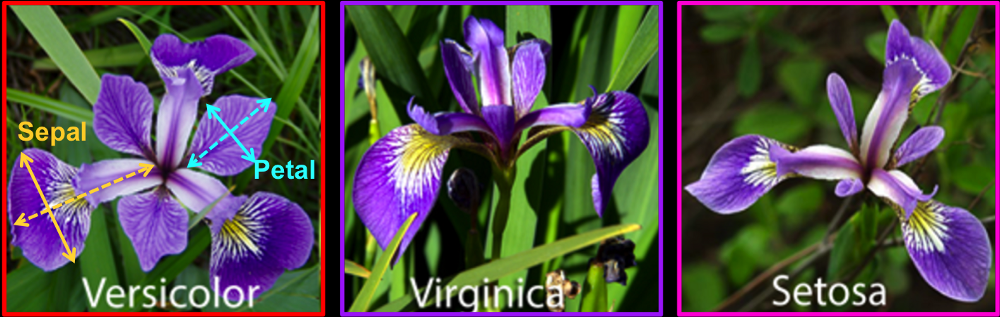

In [1]:
from IPython.display import Image
Image(filename =r'iris.png', width = 600, height = 300)

In [2]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
# load_iris has both the data and the class labels for each sample. Let's quickly extract all of it.
from sklearn.datasets import load_iris
data = load_iris().data                   # data is an array where all records are stored

In [4]:
# data variable will be a numpy array of shape (150,4) having 150 samples each having four different attributes. Each class has 50 samples each.
data.shape

(150, 4)

In [5]:
# Extract the class labels.
labels = load_iris().target
labels
# First 50 samples belongs to class 0, next 50 samples belong to class 1 and third class as 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Next, you have to # Combine the data and the class labels, and for that,we use an excellent python library called NumPy. 
# NumPy adds support for large, multi-dimensional arrays and matrices
import numpy as np
# Since data is a 2-d array, we have to reshape the labels also to a 2-d array.
labels = np.reshape(labels,(150, 1))
# We use the concatenate function available in the numpy library, and use axis=-1 which will concatenate based on the 2nd dimension.

data = np.concatenate([data,labels], axis = -1)
data.shape

(150, 5)

In [7]:
# import python's data analysis library called pandas which is useful when you want to arrange your data in a tabular fashion 
# and perform some operations and manipulations on the data.
import pandas as pd
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']   # Store the column headings
dataset = pd.DataFrame(data,columns=names)                                          # Create a dataframe based on data array and column names
dataset.head(5)

sepal-length  sepal-width  petal-length  petal-width  species
0           5.1          3.5           1.4          0.2      0.0
1           4.9          3.0           1.4          0.2      0.0
2           4.7          3.2           1.3          0.2      0.0
3           4.6          3.1           1.5          0.2      0.0
4           5.0          3.6           1.4          0.2      0.0

In [8]:
# We have the dataset data frame that has both data & the class labels
# The labels variable has class labels as numeric values, but you will convert the numeric values as the flower names or species.
# We select only the class column and replace each of the three numeric values with the corresponding species. 
# We update the labels based on the three species (Iris-setosa as 0, Iris-versicolor as 1, Iris-virginica as 2)
dataset['species'].replace(0, 'Iris-setosa', inplace = True)
dataset['species'].replace(1, 'Iris-versicolor', inplace = True)
dataset['species'].replace(2, 'Iris-virginica', inplace = True)

In [9]:
# Display the first five rows of the dataset and see what it looks like!

dataset.head(5)

sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

## Analyze iris data
We find out how all the three flowers look like when visualized and how different they are from each other.
Further details of this dataset are available on https://www.kaggle.com/arshid/iris-flower-dataset.
Let's visualize the data that you loaded above using a scatterplot to find out how much one variable is affected by the other variable or let's say how much correlation is between the two variables. We use matplotlib library to visualize the data using a scatterplot.

In [10]:
import matplotlib.pyplot as plt      # import the library matplotlib and stored as an object plt

In [11]:
plt.figure(4, figsize=(10, 8))                                               # Size of the figure as length and width
# data[:50,0] means first 50 rows for Sepal length (0), and 0 means Sepal length
# data[:50,1] means first 50 rows for Sepal width (1), and 1 means Sepal width
plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')          # Taking only first 50 rows for Iris-setosa

plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')  # Taking next 50 rows for Iris-versicolor

plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')       # Taking next 50 rows for Iris-virginica

plt.xlabel('Sepal length', fontsize = 20)
plt.ylabel('Sepal width', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Sepal length vs. Sepal width',fontsize = 20)
plt.legend(prop = {'size': 18})
plt.show()

From the above plot, it is very much apparent that there is a high correlation between the Iris setosa flowers w.r.t the sepal length and sepal width. On the other hand, there is less correlation between Iris versicolor and Iris virginica. The data points in versicolor & virginica are more spread out compared to setosa that are dense.

Now we plot the graph for petal-length and petal-width.

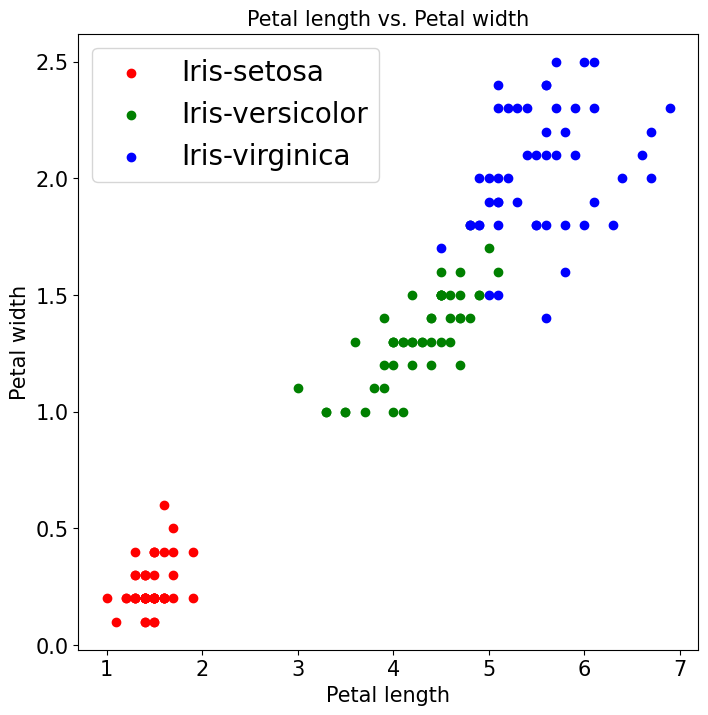

In [12]:
plt.figure(4, figsize=(8, 8))
# data[:50,2] means first 50 rows for Petal length (2), and 2 means Petal length
# data[:50,3] means first 50 rows for Petal width (3), and 3 means Petal width
plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize = 15)
plt.ylabel('Petal width',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Petal length vs. Petal width',fontsize = 15)
plt.legend(prop={'size': 20})
plt.show()

It is clear that the petal-length and petal-width indicate a strong correlation for setosa flowers which are densely clustered together.
To further validate the claim of how petal-length and petal-width are correlated, let's plot a correlation matrix for all the three species.

## Heatmap:
Heatmaps visualize the data in a 2-dimensional format in the form of colored maps. The color maps use hue, saturation, or luminance to achieve color variation to display various details. This color variation gives visual description to the readers about the magnitude of numeric values. HeatMaps is about replacing numbers with colors because the human brain understands visuals better than numbers, text, or any written data. Human beings are visual learners; therefore, visualizing the data in any form makes more sense.
Heatmaps can describe the density or intensity of variables, visualize patterns, variance, and even anomalies. Heatmaps show relationships between variables. These variables are plotted on both axes. We look for patterns in the cell by noticing the color change. It only accepts numeric data and plots it on the grid, displaying different data values by varying color intensity.

<Axes: >

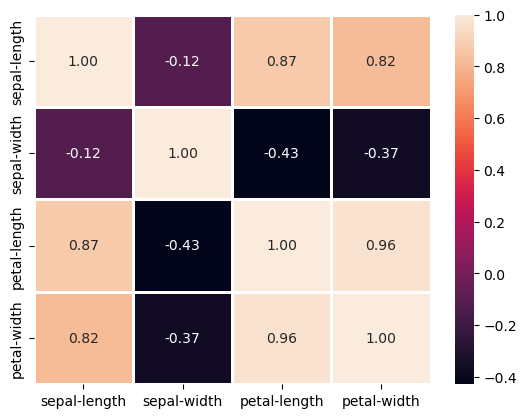

In [13]:
import seaborn as sns
sns.heatmap(dataset.corr(), annot = True, fmt = '.2f', linewidths = 2)

In [14]:
# Display the number of records per class
print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Preprocessing iris data
After having loaded the data and analyzed it extensively, it is time to prepare the data which we can then feed to our ML model. We can preprocess the data in two ways: 
(i)  Normalizing your data and 
(ii) Splitting your data into training and testing sets

### Normalizing your data
There can be two ways by which you can normalize your data. Now the question is why or when do you need to normalize your data? And do you need to standardize the Iris data?

It is a good practice to normalize your data as it brings all the samples in the same scale and range. Normalizing the data is crucial when the data you have is not consistent. We can check for inconsistency by using the describe() function that you studied above which will give usmax and min values. If the max and min values of one feature are significantly larger than the other feature then normalizing both the features to the same scale is very important.

Let's say X is one feature having a larger range and Y being the second feature with a smaller range. Then, the influence of feature Y can be overpowered by feature X's influence. In such a case, it becomes important to normalize both the features X and Y.

In Iris data, normalization is not required. Let's print the describe() function again and see why you do not need any normalization.

In [15]:
dataset.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

The sepal-length attribute has values that go from 4.3 to 7.9 and sepal-width contains values from 2 to 4.4, while petal-length values range from 1 to 6.9 and petal-width ranges from 0.1 to 2.5. The values of all the features are within the range of 0.1 and 7.9, which can consider as acceptable. Hence, we do not need to apply any normalization to the Iris dataset.

## Splitting the data
This is another significant aspect of machine learning since your goal is to make a model capable enough to be able to take decisions or classify data in a test environment without any human intervention. Hence, before deploying your ML model in the industry, we need to make sure that the model can generalize well on the testing data.

For this purpose, we need a training and testing set. Coming back to the Iris data, we have 150 samples, we will be training your ML model on 80% of the data and the remaining 20% of the data will be used for testing.

In data-science, we come across a term called Overfitting which means that your model has learned the training data very well but fails to perform on the testing data. So, splitting the data into training and testing or validation set help uso know whether ourodel is overfitting or not.

For training and testing set split, we use the sklearn library which has an in-built splitting function called train_test_split. So, let's split the data.

In [16]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3], 
                                                                dataset.iloc[:,4], test_size=0.2, random_state=42)
# We split the data for Petal length (iloc[:,:3]) and Petal width (iloc[:,:4]), 0.2 means 20% for testing and random_state 
# simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
# If we don't set a seed, it is different each time.

In [17]:
# Print the shape of training and testing data along with its labels.

train_data.shape,train_label.shape,test_data.shape,test_label.shape

((120, 3), (120,), (30, 3), (30,))

# The KNN Model
After loading, analyzing and preprocessing of the data, it is now time when we feed the data into the KNN model. To do this, we  use sklearn's inbuilt function neighbors which has a class called KNeigborsClassifier in it. Let's start by importing the classifier.

### KNN Distance Metrics

How do we measure distance?

* Euclidian
$$
d_{euclidean} = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}
$$

* Manhattan
$$
d_{manhattan} = \sum_{i=1}^{n}{|x_i - y_i|}
$$

* Minkowski (default)
$$
d_{minkowski} = (\sum_{i=1}^{n}{|x_i - y_i|^p})^{\frac{1}{p}}
$$

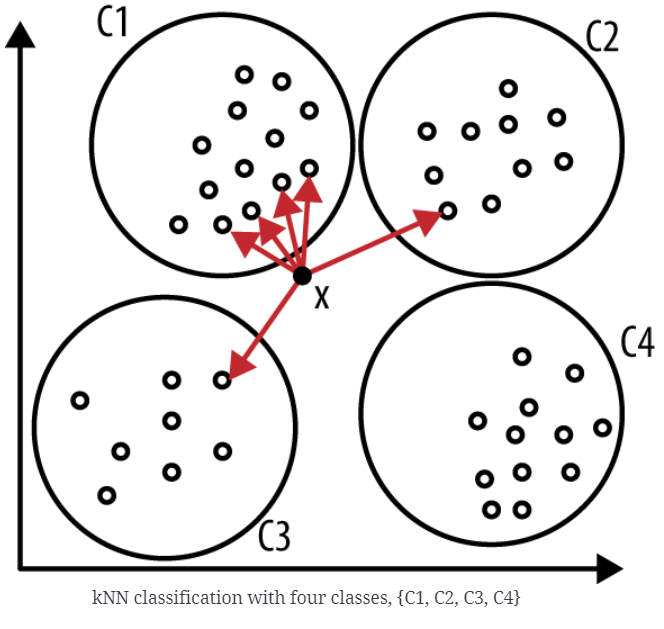

In [18]:
from IPython.display import Image
Image(filename =r'Im1.png', width = 400, height = 400)

It is clear from the above figure that if k = 6 and X = (X1, X2, ..., Xn), our goal is to find a class label from {C1, C2, C3, C4} for the unknown data X. As we can see in Figure, of the six closest neighbors, four belong to C1, one belongs to C2, one belongs to C3, and zero belong to C4. Therefore, by a majority vote, X is assigned to C1, which is a predominant class.

## An Informal kNN Algorithm
The kNN algorithm can be summarized in the following simple steps:

1) Determine k (the selection of k depends on your data and project requirements; there is no magic formula for k).<br>
2) Calculate the distances between the new input and all the training data (as with k, the selection of a distance function also depends on the type of data).<br>
3) Sort the distance and determine the k nearest neighbors based on the kth minimum distance.<br>
4) Gather the categories of those neighbors.<br>
5) Determine the category based on majority vote.<br>

## Creating a K-Nearest Neighbor Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In order to decide the best value for hyperparameter k (number of neighbors), We need to train and test your model on 10 different k values and finally use the one that gives the best results.

Let's initialize a variable neighbors(k) which will have values ranging from 1-9 and two numpy zero matrices namely train_accuracy and test_accuracy each for training and testing accuracy. We need them later to plot a graph to choose the best neighbor value.

In [20]:
neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

The following piece of code is where all the processing will happen. We enumerate over all the nine neighbor values and for each neighbor we then predict both on training and testing data. Finally, store the accuracy in the train_accuracy and test_accuracy numpy arrays.

In [21]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)      # Save the score value in the train_accuracy array

We plot the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph. Now we can choose the best k value at which our model performs the best.

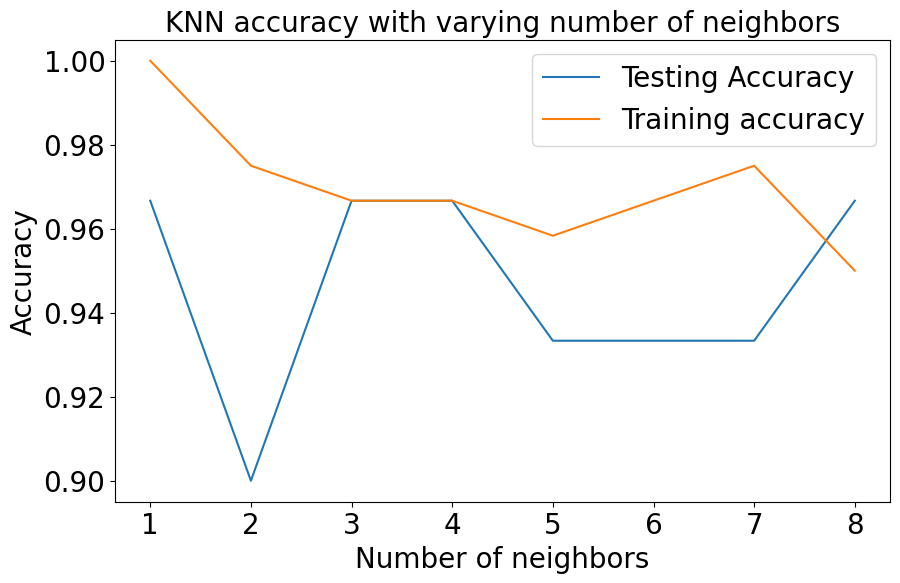

In [22]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

It is clear from the above graph when n_neighbors = 3, both the model performs the best. We now use n_neighbors=3 and re-run the training once again.

In [23]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

## Evaluating your Model
In the last part of this tutorial, we evaluate the model on the testing data using a couple of techniques like confusion_matrix and classification_report. Let's first check the accuracy of the model on the testing data.

In [24]:
# Display the test accuracy
print(test_accuracy)

0.9666666666666667


We obtain the model accuracy to classify 96.66% of the testing data correctly. With a few lines of code, we were able to train an ML model that is now able to tell you the flower name by using only four features with 96.66% accuracy. 
### Confusion Matrix
A confusion matrix is mainly used to describe the performance of ML model on the test data for which the true values or labels are known. Scikit-learn provides a function that calculates the confusion matrix for you.

In [25]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(test_data)

# Display the confusion matrix
confusion_matrix(test_label, prediction)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [26]:
# import the library classification_report
from sklearn.metrics import classification_report

# Display the report
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Task:
We provided a diabetes.csv data set (https://www.kaggle.com/uciml/pima-indians-diabetes-database) on Moodle. USe this dataset and classify the patients based on the feature 'Outcome'. O means no diabetes and 1 means diabetes. Apply kNN classification model and calculate R2 value for the prediction.

In [27]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first 5 rows of the dataframe.
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [29]:
# Display the number of rows and columns
df.shape

(768, 9)

In [30]:
# Create the independent and dependent variables
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 28, stratify = y)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Declare arrays to store training and test accuracies
neighbors = np.arange(1, 10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Declare and initialise kNN classifier with k neighbors
    kNN = KNeighborsClassifier(n_neighbors = k)
    
    # Call the method fit() to train the model
    kNN.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test) 

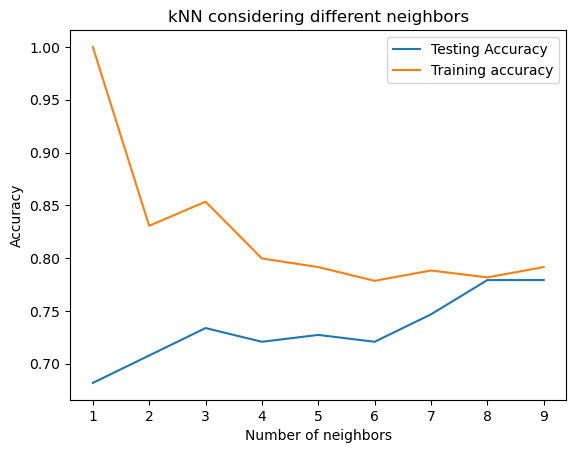

In [33]:
# Visualise the accuracy based on the number of neighbors
plt.title('kNN considering different neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
# Declare and initialise kNN classifier with 7 neighbors
kNN_cl = KNeighborsClassifier(n_neighbors = 8)

# Call fit() method to train the model
kNN_cl.fit(X_train, y_train)

# Calculate r2 score
kNN_cl.score(X_test, y_test)

0.7792207792207793

In [35]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the results
y_pred = kNN_cl.predict(X_test)

# Display the confusion matrix
confusion_matrix(y_test,y_pred)

array([[96,  4],
       [30, 24]], dtype=int64)

In [36]:
# Use crosstabl method draw the confusion matrix
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted    0   1  All
True                   
0           96   4  100
1           30  24   54
All        126  28  154

In [37]:
#vimport the library for classification report
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       100
           1       0.86      0.44      0.59        54

    accuracy                           0.78       154
   macro avg       0.81      0.70      0.72       154
weighted avg       0.80      0.78      0.76       154



## Reference:
* Introduction to Machine Learning with Python, Andreas C. Müller and Sarah Guido, O'Reilly Media, Inc. October 2016.
* <p>www.datacamp.com/community/tutorials/introduction-machine-learning-python</p>
* <p>www.kaggle.com</p>
* Data Algorithms, O'Reilly Media, Inc., July 2015, 778 pages.